# PHÂN TÍCH DỮ LIỆU

## Cài đặt thư viện cần thiết

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib.dates import DateFormatter

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Data/MotChutCute_clean.csv')

In [5]:
data

,post_id,text,post_text,original_text,time,timestamp,image,image_lowquality,images,images_description,...,care,haha,like,love,sad,wow,hour,day,month,year
0,729548155875244,Chạm vào để xem bí mật nha\n#ltpt,Chạm vào để xem bí mật nha\n#ltpt,NaN,2023-11-28 21:30:01,1701181801,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan15-2.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,"[""May be an illustration of text that says '♡ ...",...,6.0,225.0,440.0,95.0,5.0,5.0,21,28,11,2023
1,728861452610581,Nếu có siêu năng lực này cậu cũng là siêu nhân...,Nếu có siêu năng lực này cậu cũng là siêu nhân...,NaN,2023-11-28 17:00:01,1701165601,https://scontent.fhan15-2.fna.fbcdn.net/v/t39....,https://scontent.fhan15-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan15-2.fna.fbcdn.net/v/t3...,"[""May be a doodle of text that says 'Một Chút ...",...,18.0,8.0,557.0,293.0,0.0,0.0,17,28,11,2023
2,727446596085400,"Dậy sớm là gặp may mắn ngay nè, hí hí\n#ltpt","Dậy sớm là gặp may mắn ngay nè, hí hí\n#ltpt",NaN,2023-11-28 07:00:00,1701129600,https://scontent.fhan15-1.fna.fbcdn.net/v/t39....,https://scontent.fhan15-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan15-1.fna.fbcdn.net/v/t3...,"[""May be a doodle of text that says 'Nếu cậu đ...",...,56.0,25.0,2047.0,682.0,2.0,0.0,7,28,11,2023
3,728860822610644,Biết tay tui liền 💪💪💪\n#trada,Biết tay tui liền 💪💪💪\n#trada,NaN,2023-11-27 17:00:02,1701079202,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan15-1.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,['May be a doodle of slow loris and text'],...,72.0,877.0,1201.0,496.0,12.0,1.0,17,27,11,2023
4,727478582748868,"Với chị, em luôn sẵn sàng 😽\n#trada","Với chị, em luôn sẵn sàng 😽\n#trada",NaN,2023-11-27 11:20:01,1701058801,https://scontent.fhan15-2.fna.fbcdn.net/v/t39....,https://scontent.fhan15-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan15-2.fna.fbcdn.net/v/t3...,['May be an image of text'],...,204.0,181.0,1791.0,964.0,2.0,4.0,11,27,11,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,693187432844650,Meo meo~ đoán xem có gì nào?\n#ltpt,Meo meo~ đoán xem có gì nào?\n#ltpt,NaN,2023-09-30 12:00:01,1696050001,https://scontent.fhan15-1.fna.fbcdn.net/v/t39....,https://scontent.fhan15-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan15-1.fna.fbcdn.net/v/t3...,"[""May be an illustration of text that says 'Om...",...,85.0,18.0,395.0,362.0,2.0,0.0,12,30,9,2023
96,691268949703165,Là ý nghĩa chưa?\n#ltpt,Là ý nghĩa chưa?\n#ltpt,NaN,2023-09-30 09:00:01,1696039201,https://scontent.fhan15-2.fna.fbcdn.net/v/t39....,https://scontent.fhan15-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan15-2.fna.fbcdn.net/v/t3...,"[""May be an illustration of text that says 'Cu...",...,2.0,158.0,1013.0,15.0,2.0,0.0,9,30,9,2023
97,693187016178025,"Hạnh phúc là có một người luôn lắng nghe mình,...","Hạnh phúc là có một người luôn lắng nghe mình,...",NaN,2023-09-29 21:30:00,1695997800,https://scontent.fhan15-1.fna.fbcdn.net/v/t39....,https://scontent.fhan15-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan15-1.fna.fbcdn.net/v/t3...,"[""May be an illustration of text that says 'Bl...",...,7.0,8.0,1062.0,146.0,4.0,0.0,21,29,9,2023
98,691271019702958,Chạm vào đi mà\n#ltpt,Chạm vào đi mà\n#ltpt,NaN,2023-09-29 17:00:00,1695981600,https://scontent.fhan15-1.fna.fbcdn.net/v/t39....,https://scontent.fhan15-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan15-1.fna.fbcdn.net/v/t3...,"[""May be a graphic of text that says 'omột chú...",...,328.0,8.0,2540.0,1769.0,4.0,2.0,17,29,9,2023


## Bài viết có lượt tương tác cao nhất

In [6]:
# Tính tổng lượt tương tác cho mỗi bài viết
data['total_interactions'] = data['comments'] + data['reaction_count'] + data['shares']

# Sắp xếp DataFrame theo tổng lượt tương tác giảm dần
sorted_data = data.sort_values(by='total_interactions', ascending=False)

# Lấy thông tin của bài viết có tổng lượt tương tác cao nhất
most_interactions_post = sorted_data.iloc[0]

# Lấy thông tin từng loại reactions
reactions_info = most_interactions_post[['like', 'love', 'haha', 'wow', 'sad', 'angry']]
reactions_info = reactions_info.astype('int64')

# In thông tin bài viết
print("Thông tin bài viết có lượt tương tác cao nhất:\n")
print(most_interactions_post[['post_id', 'time', 'total_interactions', 'comments', 'shares']])
print("\nThông tin từng loại reactions:")
print(reactions_info)

Thông tin bài viết có lượt tương tác cao nhất:

post_id                   701646901998703
time                  2023-10-12 17:00:01
total_interactions                  15143
comments                              602
shares                                349
Name: 84, dtype: object

Thông tin từng loại reactions:
like     7443
love     6292
haha      110
wow         7
sad        19
angry       2
Name: 84, dtype: int64


## So sánh bài viết có lượt reactions cao nhất và thấp nhất

In [7]:
# Đếm lượt reaction cao nhất
data['reaction_count'].max()

14192

In [8]:
# Đếm lượt reaction thấp nhất
data['reaction_count'].min()

776

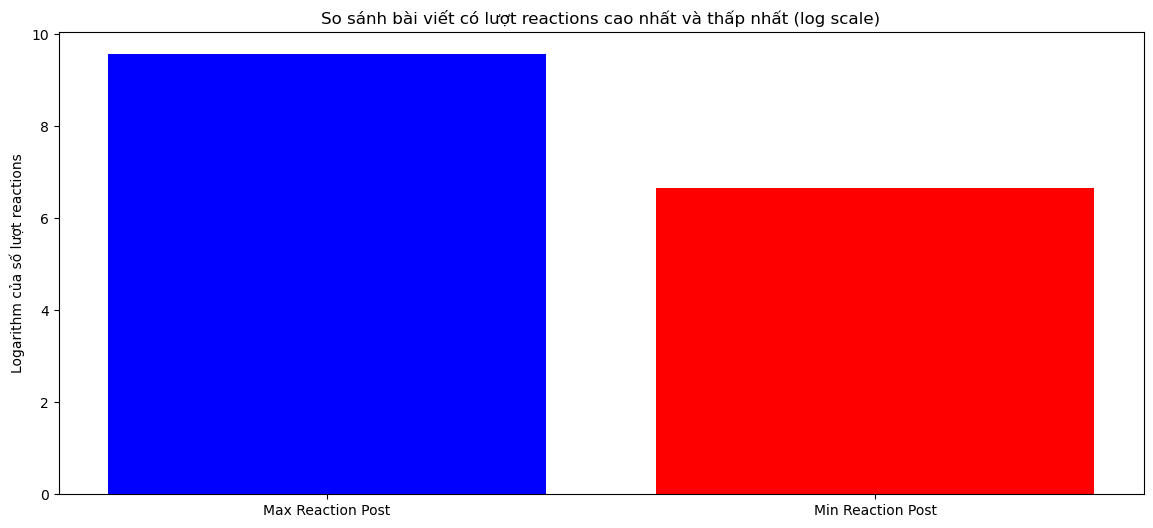

In [9]:
# Lấy thông tin bài viết có lượt reactions cao nhất và thấp nhất
max_reaction_post = data.loc[data['reaction_count'].idxmax()]
min_reaction_post = data.loc[data['reaction_count'].idxmin()]

# Xây dựng dữ liệu cho biểu đồ
post_ids = ['Max Reaction Post', 'Min Reaction Post']
reaction_counts = [max_reaction_post['reaction_count'], min_reaction_post['reaction_count']]

# Vẽ biểu đồ log
plt.figure(figsize=(14, 6))
plt.bar(post_ids, np.log(reaction_counts), color=['blue', 'red'])
plt.title('So sánh bài viết có lượt reactions cao nhất và thấp nhất (log scale)')
plt.ylabel('Logarithm của số lượt reactions')
plt.show()

## Thời gian Fanpage thường đăng bài viết trong ngày

In [10]:
# Tổng số bài viết theo giờ
total_posts_by_hour = data['hour'].value_counts()
total_posts_by_hour = total_posts_by_hour.reindex(range(24), fill_value=0)
total_posts_by_hour

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      2
9     13
10     3
11     8
12     4
13     0
14     1
15     2
16     0
17    44
18     1
19     2
20     4
21     5
22    10
23     0
Name: hour, dtype: int64

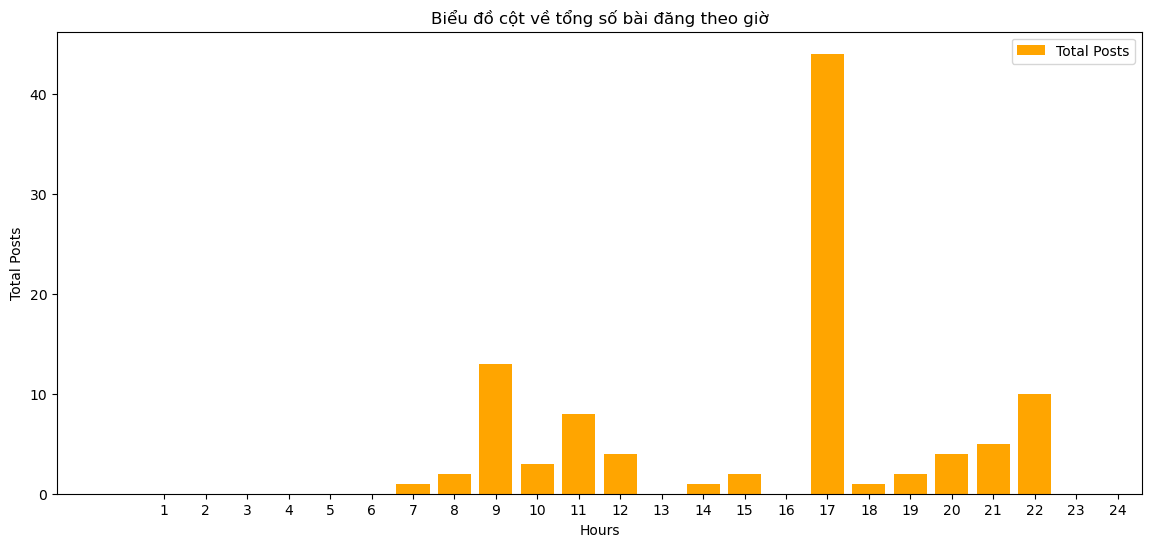

In [11]:
# Vẽ biểu đồ cột tổng số bài đăng theo giờ

fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(total_posts_by_hour.index, total_posts_by_hour.values, color='orange', label='Total Posts')
ax.set_xticks(range(1, 25))
ax.set_xlabel('Hours')
ax.set_ylabel('Total Posts')

plt.title('Biểu đồ cột về tổng số bài đăng theo giờ')
plt.legend()
plt.show()

## Thay đổi lượt tương tác giữa các bài đăng

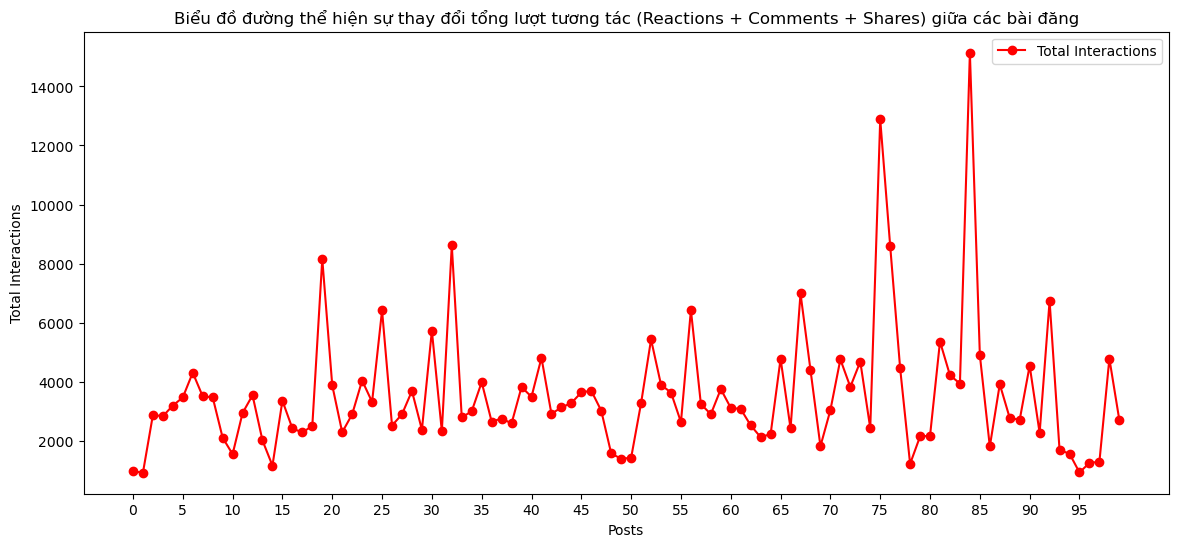

In [12]:
# Vẽ biểu đồ đường thể hiện sự thay đổi tổng lượt tương tác (Reactions + Comments + Shares) giữa các bài đăng

# Tính tổng số lượt tương tác (Reactions + Shares + Comments)
data['total_interactions'] = data['reaction_count'] + data['shares'] + data['comments']

# Vẽ biểu đồ đường cho tổng số lượt tương tác của mỗi bài đăng
plt.figure(figsize=(14, 6))

plt.plot(np.arange(len(data)), data['total_interactions'], label='Total Interactions', color='red', marker = 'o')

plt.xticks(np.arange(0, len(data), step=5))

plt.title('Biểu đồ đường thể hiện sự thay đổi tổng lượt tương tác (Reactions + Comments + Shares) giữa các bài đăng')
plt.xlabel('Posts')
plt.ylabel('Total Interactions')
plt.legend()
plt.show()

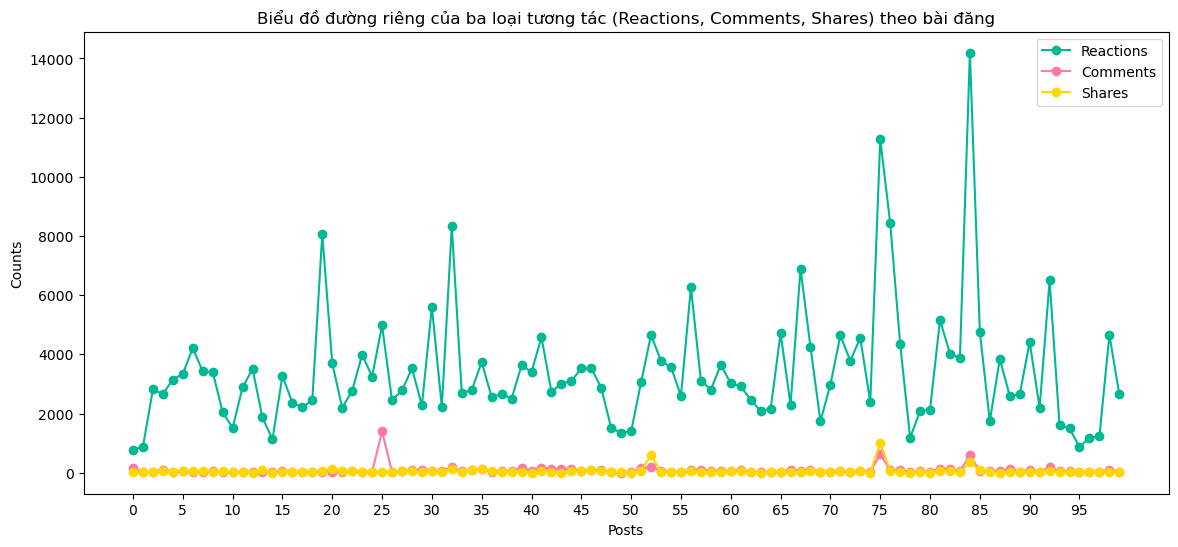

In [13]:
# Vẽ biểu đồ đường riêng của ba loại tương tác (Reactions, Comments, Shares) giữa các bài đăng

plt.figure(figsize=(14, 6))

plt.plot(np.arange(len(data)), data['reaction_count'], label='Reactions', color='#00b894', marker = 'o')
plt.plot(np.arange(len(data)), data['comments'], label='Comments', color='#fd79a8', marker = 'o')
plt.plot(np.arange(len(data)), data['shares'], label='Shares', color='#ffd700', marker = 'o')

plt.xticks(np.arange(0, len(data), step=5))

plt.title('Biểu đồ đường riêng của ba loại tương tác (Reactions, Comments, Shares) theo bài đăng')
plt.xlabel('Posts')
plt.ylabel('Counts')
plt.legend()
plt.show()

## Từ khóa xuất hiện nhiều nhất trong các bài đăng

In [14]:
# Đọc tất cả các post
df_text = data[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,729548155875244,Chạm vào để xem bí mật nha\n#ltpt
1,728861452610581,Nếu có siêu năng lực này cậu cũng là siêu nhân...
2,727446596085400,"Dậy sớm là gặp may mắn ngay nè, hí hí\n#ltpt"
3,728860822610644,Biết tay tui liền 💪💪💪\n#trada
4,727478582748868,"Với chị, em luôn sẵn sàng 😽\n#trada"
...,...,...
95,693187432844650,Meo meo~ đoán xem có gì nào?\n#ltpt
96,691268949703165,Là ý nghĩa chưa?\n#ltpt
97,693187016178025,"Hạnh phúc là có một người luôn lắng nghe mình,..."
98,691271019702958,Chạm vào đi mà\n#ltpt


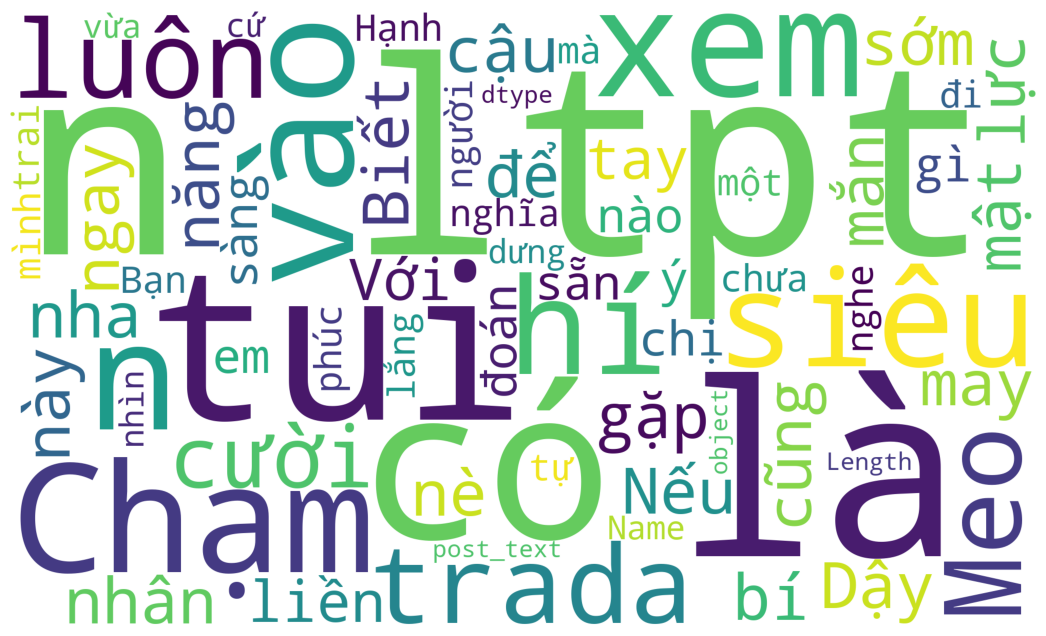

In [15]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(16, 8))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## So sánh tương tác của bài viết có nội dung dài ngắn và ngắn nhất

In [16]:
# Tính độ dài của mỗi bài đăng
data['post_length'] = data['post_text'].apply(lambda x: len(str(x)))

# Lấy ra bài đăng có độ dài lớn nhất
longest_post = data.loc[data['post_length'].idxmax()]
# Lấy ra bài đăng có độ dài bé nhất
shortest_post = data.loc[data['post_length'].idxmin()]

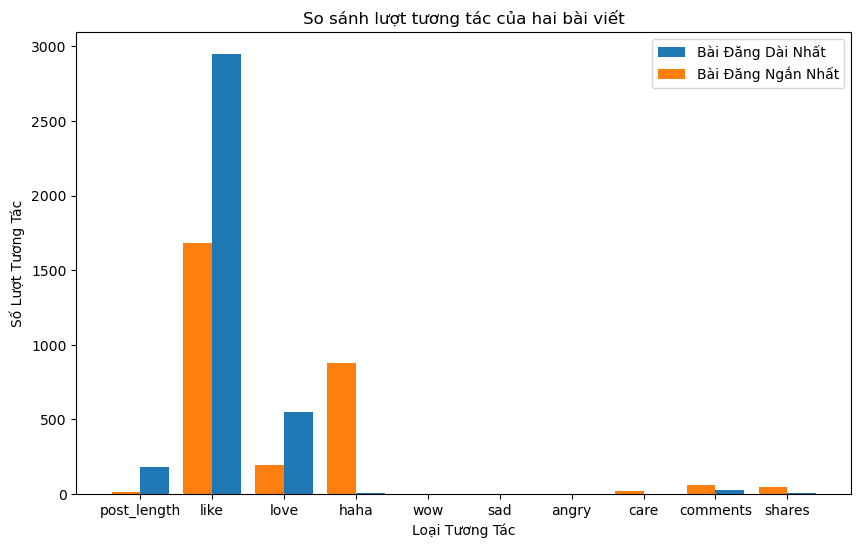

In [17]:
# Lấy thông tin của hai bài viết
longest_post_info = longest_post[['post_length', 'like', 'love', 'haha', 'wow', 'sad', 'angry', 'care', 'comments', 'shares']]
shortest_post_info = shortest_post[['post_length', 'like', 'love', 'haha', 'wow', 'sad', 'angry', 'care', 'comments', 'shares']]

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ cho bài đăng dài nhất
ax.bar(longest_post_info.index, longest_post_info.values, width=0.4, label='Bài Đăng Dài Nhất', align='edge')

# Vẽ biểu đồ cho bài đăng ngắn nhất
ax.bar(shortest_post_info.index, shortest_post_info.values, width=-0.4, label='Bài Đăng Ngắn Nhất', align='edge')

plt.title('So sánh lượt tương tác của hai bài viết')
plt.xlabel('Loại Tương Tác')
plt.ylabel('Số Lượt Tương Tác')
plt.legend()
plt.show()

## Đánh giá tổng lượt các tương tác

In [18]:
# Tính tổng của các Reactions riêng
total_reactions = data[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry', 'shares', 'comments']].sum()

print(round(total_reactions))

like        217500.0
love         93322.0
haha         20998.0
wow            131.0
care          6308.0
sad            750.0
angry            7.0
shares        5603.0
comments      8742.0
dtype: float64


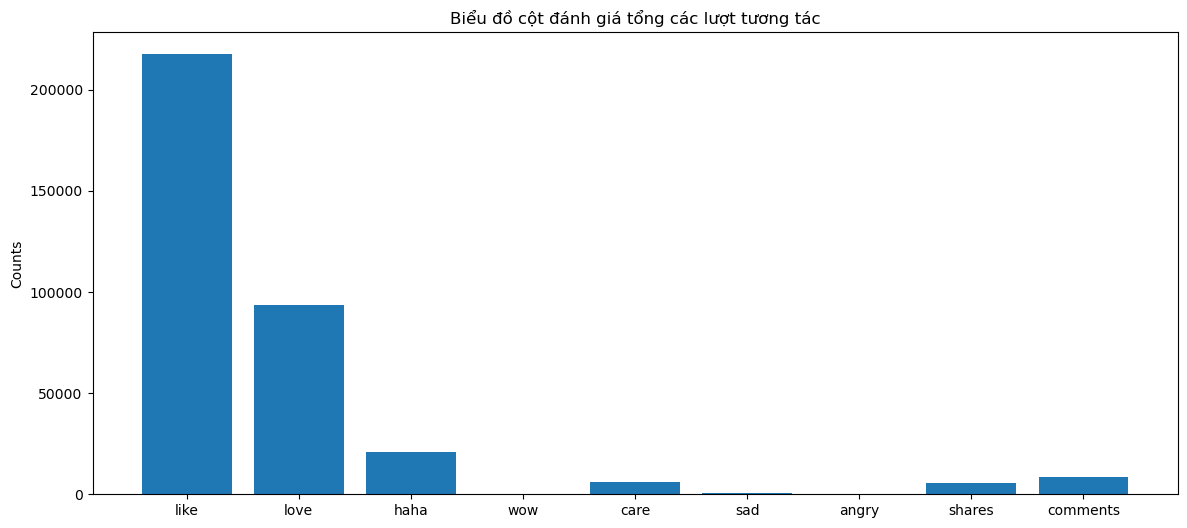

In [19]:
# Vẽ biểu đồ cột đánh giá tổng các lượt tương tác

plt.figure(figsize=(14, 6))

plt.bar(total_reactions.index, total_reactions.values)

plt.ylabel('Counts')
plt.ticklabel_format(style='plain', axis='y')

plt.title('Biểu đồ cột đánh giá tổng các lượt tương tác')
plt.show()

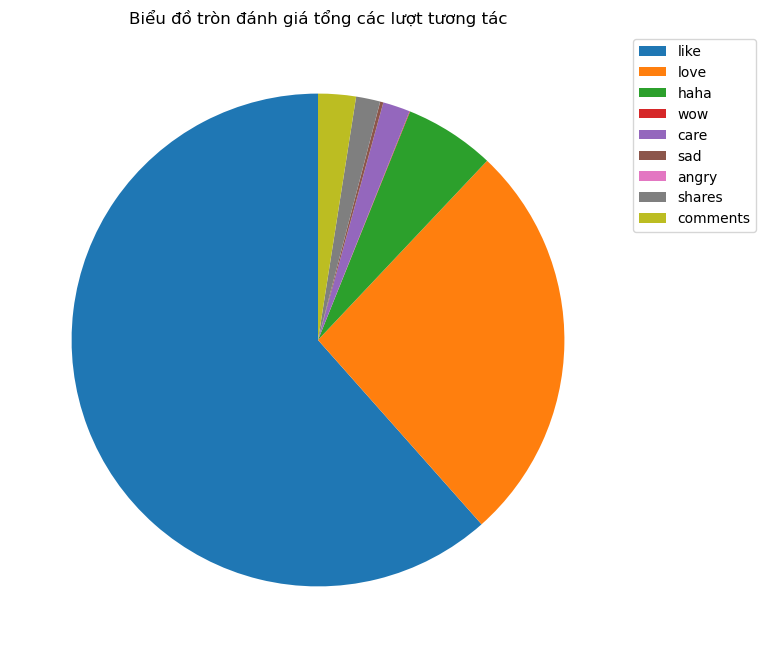

In [20]:
# Vẽ biểu đồ tròn đánh giá tổng các lượt tương tác

plt.figure(figsize=(8, 8))

plt.pie(total_reactions.values, startangle=90)
plt.title('Biểu đồ tròn đánh giá tổng các lượt tương tác')

plt.legend(labels=total_reactions.index, bbox_to_anchor=(1, 1))
plt.show()

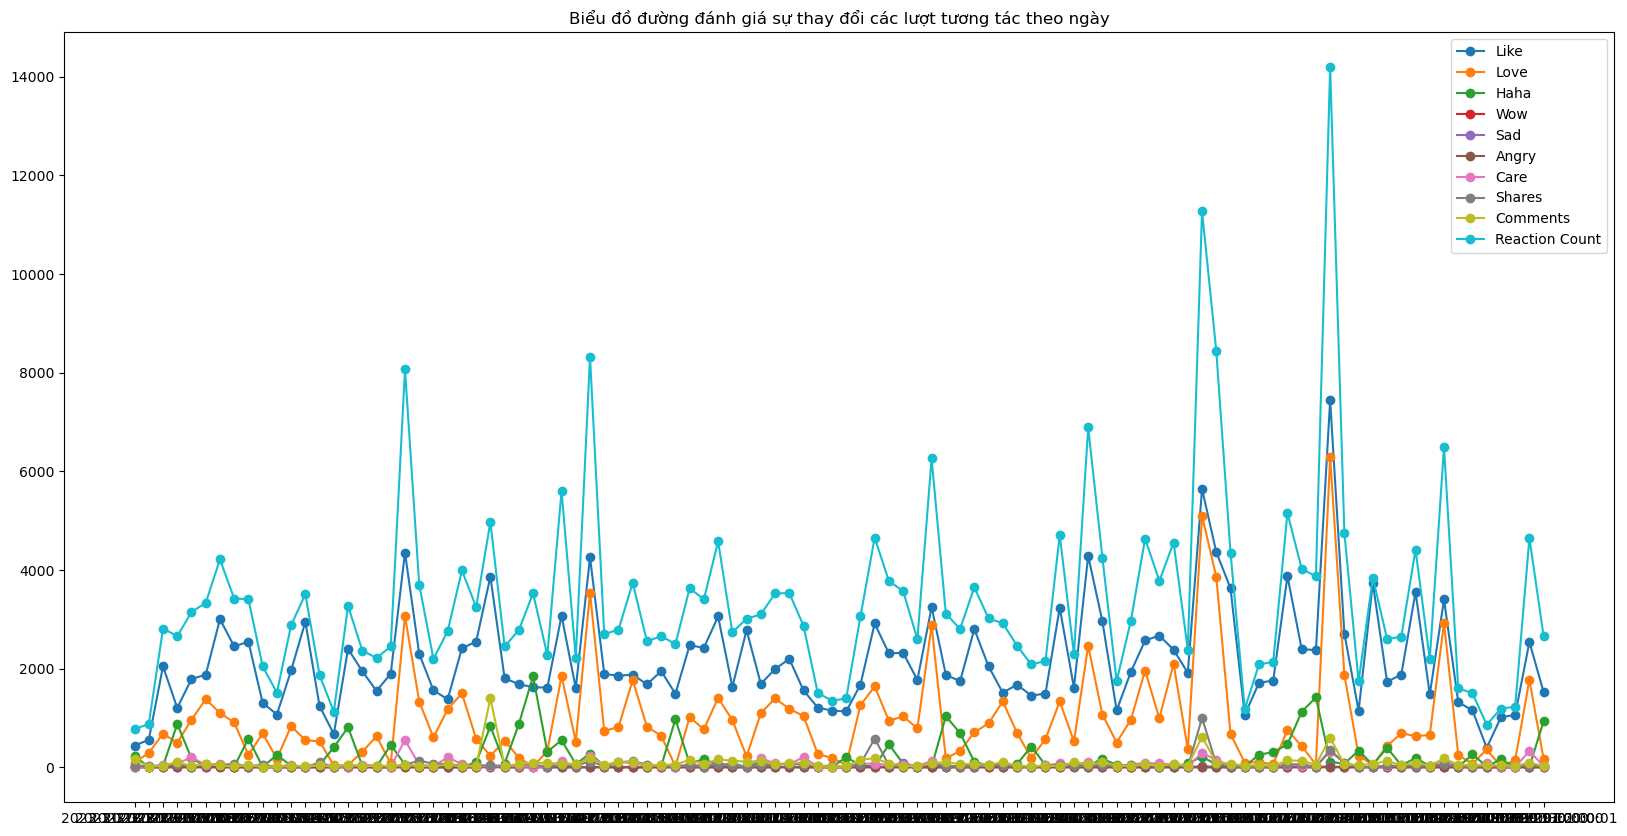

In [21]:
# Vẽ biểu đồ đường đánh giá sự thay đổi các lượt tương tác theo ngày

fig, ax = plt.subplots(figsize=(20, 10))

columns_to_plot = ['like', 'love', 'haha', 'wow', 'sad', 'angry', 'care', 'shares', 'comments', 'reaction_count']
labels = ["Like", "Love", "Haha", "Wow", "Sad", "Angry", "Care", "Shares", "Comments", "Reaction Count"]

for col, label in zip(columns_to_plot, labels):
    ax.plot(data['time'], data[col], label=label, marker = 'o')

plt.title('Biểu đồ đường đánh giá sự thay đổi các lượt tương tác theo ngày')
plt.legend()
plt.show()

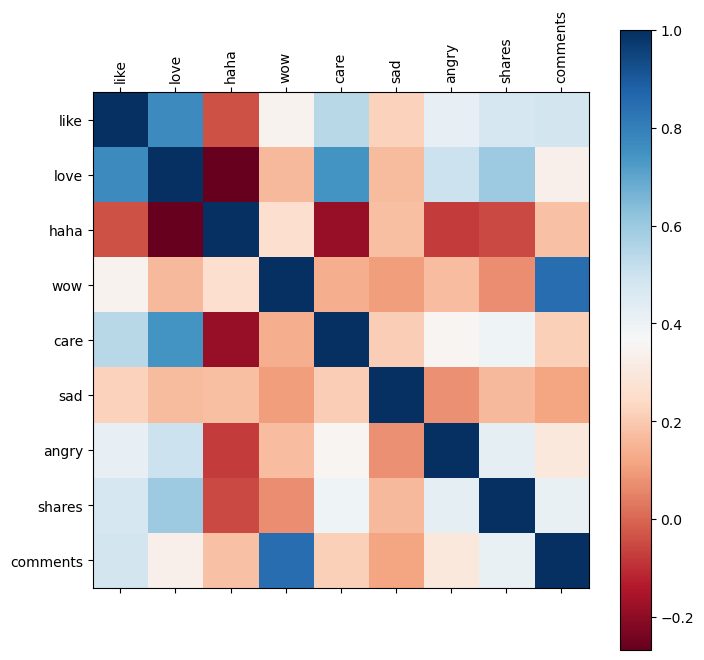

In [22]:
# Vẽ heatmap giữa các loại tương tác

corr = data[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry', 'shares', 'comments']].corr()

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()